In [342]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando as bibliotecas que iremos utilizar para preparação do modelo

In [343]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler

Um breve resumo sobre as bibliotecas importadas

**Pandas:** A biblioteca pandas é uma ferramenta de análise de dados em Python que permite a manipulação e processamento de dados de diversas formas.

**matplotlib.pyplot:** A biblioteca matplotlib.pyplot é uma ferramenta para criação de gráficos e visualização de dados em Python. Essa biblioteca oferece diversas funcionalidades para a criação de gráficos de diferentes tipos, como histogramas, gráficos de barras, gráficos de dispersão, entre outros.

**Seaborn:** A biblioteca seaborn é uma ferramenta de visualização de dados em Python que é baseada na biblioteca matplotlib. A seaborn oferece diversas funcionalidades para a criação de gráficos estatísticos, permitindo a visualização de relações e distribuições de dados de forma clara e concisa.

**Numpy:** A biblioteca NumPy é uma ferramenta essencial para computação científica em Python. Ela oferece diversas funcionalidades para manipulação de arrays multidimensionais, matrizes e funções matemáticas avançadas.

**Math:** A biblioteca math é uma biblioteca padrão em Python que oferece funções matemáticas básicas para cálculos numéricos. Essa biblioteca é útil para tarefas matemáticas básicas, incluindo operações aritméticas simples, cálculos trigonométricos, funções exponenciais e logarítmicas, entre outras.

**MinMaxScaler:** A função MinMaxScaler é uma técnica de pré-processamento de dados usada em aprendizado de máquina para dimensionar os recursos (features) em um intervalo específico, geralmente entre 0 e 1, a fim de evitar que recursos com valores maiores tenham um impacto maior no modelo do que recursos com valores menores.

#Transformando os aquivos .csv para DataFrame

In [344]:
df_demograficos = pd.read_csv('/content/drive/MyDrive/2023-1A-T05/GRUPOS/Grupo 4 - G4/Datasets/tabelas/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv')
df_histopatologia = pd.read_csv('/content/drive/MyDrive/2023-1A-T05/GRUPOS/Grupo 4 - G4/Datasets/tabelas/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
df_peso_altura = pd.read_csv('/content/drive/MyDrive/2023-1A-T05/GRUPOS/Grupo 4 - G4/Datasets/tabelas/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')
df_registro_tumor = pd.read_csv('/content/drive/MyDrive/2023-1A-T05/GRUPOS/Grupo 4 - G4/Datasets/tabelas/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')

# Funções Utilitárias para otimizar a exploração e pre processamento dos dados

In [345]:
# Normaliza o nome de todas as colunas em snake_case, no diminutivo e sem acentos.
def clean_column_names(df):
  striped_columns = []
  for column in df.columns:
    striped_columns.append(column.strip().lower().replace(' ', '_').replace('_a _', '_').replace('-', '_').replace('ª', '').replace('º', '').replace("=", "_").replace('#', '').replace('ó', 'o').replace('á', 'a').replace('ç', 'c').replace('é', 'e').replace('ã', 'a').replace('â', 'a').replace('à', 'a').replace('ú', 'u').replace('?', '').replace(',', '').replace('[', '').replace(']', '').replace('(', '').replace(')', '').replace('í', 'i').replace('__', '_').replace('/', '').replace('__', '_'))

  df.columns = striped_columns
  return df



# Eliminando Outliers da coluna passando por parâmetro levando em consideração o desvio padrão
def exclui_outliers(DataFrame, col_name):
  intervalo = 3*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan



# Função que substitui os valores NaN por valores decididos de forma aleatória dentro de um intervalo da distribuição normal para evitar a presença de outliers
def replace_nan(df, col, categorical):
  
  # Encontra a média e o desvio padrão dos valores da coluna
  mean = df[col].mean()
  std = df[col].std()
  
  # Cria valores de acordo com a distribuição normal
  # Faz com que os valores criados fiquem dentro do intervalo de valor mínimo e máximo da coluna
  new_values = pd.Series(np.random.normal(mean, std, size=len(df[col].isnull()))).clip(df.dropna()[col].min(), df.dropna()[col].max())
  
  if categorical == True:
    
    # Arredonda os valores caso a coluna seja categórica
    new_values = new_values.round(decimals=0)

  # Preenche os valores nulos com os valores gerados
  for i in range(0, len(new_values)):
    df[col] = df[col].fillna(new_values[i])

#Explorando dataframes individualmente

## DataFrame(Demograficos)

###Exploração inicial
Neste estágio, começamos a obter uma compreensão mais profunda de nossos dados, utilizando diferentes métodos para visualizar informações como a quantidade de linhas numéricas e categóricas, a quantidade de colunas, valores nulos, valores discrepantes (outliers) e algumas informações estatísticas descritivas do nosso DataFrame. Essas análises são cruciais para avaliar a qualidade dos dados e garantir que possamos utilizá-los adequadamente em nossos modelos de aprendizado de máquina. Além disso, essas informações ajudam a orientar o pré-processamento de dados e a seleção de recursos para construir modelos mais precisos e eficazes.

In [346]:
df_demograficos.head()

,Record ID,Repeat Instrument,Repeat Instance,Escolaridade,Idade do paciente ao primeiro diagnóstico,Sexo,Raça declarada (Biobanco),UF de nascimento do paciente,UF de residência do paciente,Data da última informação sobre o paciente,...,"Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))",Regime de Tratamento,Hormonioterapia,Data da cirurgia,Tipo de terapia anti-HER2 neoadjuvante,Radioterapia,Data de início do tratamento quimioterapia,Esquema de hormonioterapia,Data do início Hormonioterapia adjuvante,Data de início da Radioterapia
0,302,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,51.0,Feminino,NaN,NaN,NaN,2014-04-26,...,Unchecked,NaN,NaN,NaN,Trastuzumabe,NaN,NaN,Inibidor de aromatase isolado,NaN,NaN
1,710,NaN,NaN,ENSINO MÉDIO,58.0,Feminino,NaN,NaN,NaN,2016-11-17,...,Unchecked,Terapia Adjuvante,NaN,2009-09-04,NaN,NaN,2014-08-24,NaN,NaN,NaN
2,752,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,56.0,Feminino,NaN,NaN,NaN,2019-05-02,...,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1367,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,63.0,Feminino,NaN,NaN,NaN,2011-09-29,...,Unchecked,NaN,NaN,2011-07-05,NaN,NaN,NaN,NaN,NaN,NaN
4,1589,NaN,NaN,ENS. FUNDAMENTAL COMPLETO,42.0,Feminino,NaN,NaN,NaN,2017-05-24,...,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 48 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   Record ID                                                                                                                          4272 non-null   int64  
 1   Repeat Instrument                                                                                                                  0 non-null      float64
 2   Repeat Instance                                                                                                                    0 non-null      float64
 3   Escolaridade                                                                            

In [348]:
df_demograficos.shape

(4272, 48)

In [349]:
df_demograficos.describe()

,Record ID,Repeat Instrument,Repeat Instance,Idade do paciente ao primeiro diagnóstico,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Quantas vezes ficou gráfida?,Número de partos,Idade na primeira gestação,Por quanto tempo amamentou?,Idade da primeira mentruação
count,4272.00,0.0,0.0,4092.00,4270.00,44.00,2.00,897.00,688.00,1025.00
mean,48652.36,NaN,NaN,54.25,1475.00,2.32,1.50,23.06,19.04,12.89
std,20659.52,NaN,NaN,13.57,859.62,1.41,0.71,5.67,23.11,2.10
min,302.00,NaN,NaN,22.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,31013.00,NaN,NaN,45.00,956.25,1.00,1.25,19.00,6.00,12.00
50%,53394.00,NaN,NaN,54.00,1282.00,2.00,1.50,22.00,12.00,13.00
75%,65816.75,NaN,NaN,64.00,1817.75,3.00,1.75,26.00,24.00,14.00
max,82240.00,NaN,NaN,98.00,4503.00,7.00,2.00,53.00,260.00,37.00


<AxesSubplot:title={'center':' Última informação do paciente x Idade do paciente ao primeiro diagnóstico '}, xlabel='Idade do paciente ao primeiro diagnóstico', ylabel='Última informação do paciente'>

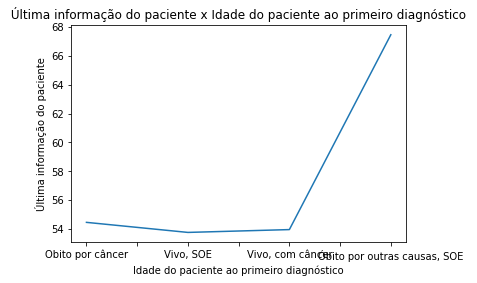

In [350]:
df_agrupado = df_demograficos.groupby("Última informação do paciente")
df_agrupado['Idade do paciente ao primeiro diagnóstico'].mean().plot(kind='line', ylabel='Última informação do paciente', xlabel='Idade do paciente ao primeiro diagnóstico', title=" Última informação do paciente x Idade do paciente ao primeiro diagnóstico ")

###Limpeza dos dados
A limpeza de dados é uma etapa fundamental no processo de construção de modelos preditivos, pois dados sujos ou inconsistentes podem prejudicar a precisão e a eficácia do modelo. *Ao* efetuar a limpeza dos dados, podemos garantir que nosso modelo tenha um desempenho melhor e forneça resultados mais precisos e confiáveis. Além disso, ao remover os dados desnecessários e irrelevantes, podemos melhorar a eficiência do modelo e reduzir o tempo necessário para treinar e testar o modelo

####Deletando algumas colunas
**Repeat Instrument** - Motivo: Sem dados preenchidos

**Repeat Instance** - Motivo: Sem dados preenchidos

**Raça declarada (Biobanco)** - Motivo: Poucos dados preenchidos e por ser "raça declarada" não temos 100% de confiabilidade 

**UF de nascimento do paciente** - Motivo: Apenas dois dados preenchidos

**UF de residência do paciente** - Motivo: Apenas dois dados preenchidos

**Historia familiar ? 2º grau, apenas 1 caso e 2º grau, mais de 1 caso** - Motivo: Sem dados preenchidos

**Faz uso de métodos contraceptivo?** - Motivo: Apenas três dados preenchidos

**Hormonioterapia** - Motivo: Apenas três dados preenchidos

**Esquema de hormonioterapia** - Motivo: Poucos dados preenchidos (12)

**Data do início Hormonioterapia adjuvante** - Motivo: Apenas dois dados preenchidos

**Número de partos** - Motivo: Apenas 2 dados preenchidos

**Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)** - Motivo: Apenas dois dados preenchidos

**Abortou** - Motivo - Apenas 11 dados preenchidos

**Já fez uso de drogas?** - Motivo: Apenas um sim

**Qual método? (choice=DIU)** - Motivo: Sem dados preenchidos

**Qual método? (choice=camisinha)** - Motivo: Sem dados preenchidos

**Qual método? (choice=outros)** - Motivo: Sem dados preenchidos

**Qual método? (choice=não informou)** - Motivo: Sem dados preenchidos

In [351]:
df_demograficos.drop(columns=['Repeat Instrument', 
                              'Repeat Instance',
                              'Raça declarada (Biobanco)', 
                              'UF de nascimento do paciente', 
                              'UF de residência do paciente', 
                              'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 caso)', 
                              'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, mais de 1 caso)', 
                              'Faz uso de métodos contraceptivo?',
                              'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)',
                              'Qual método? (choice=DIU)', 
                              'Qual método? (choice=Pílula anticoncepcional)', 
                              'Qual método? (choice=camisinha)', 
                              'Qual método? (choice=outros)',
                              'Número de partos',
                              'Abortou', 
                              'Qual método? (choice=não informou)', 
                              'Já fez uso de drogas?', 
                              'Data do início Hormonioterapia adjuvante',
                              'Esquema de hormonioterapia', 
                              'Hormonioterapia '], inplace = True)

####Removendo todas as linhas que só tinham o record_id

In [352]:
df_demograficos = df_demograficos.dropna(subset=list(df_demograficos.columns)[1:], how='all')

DataFrame após retirada das colunas e linhas nulas

In [353]:
df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 0 to 4271
Data columns (total 28 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   Record ID                                                                                                                          4272 non-null   int64  
 1   Escolaridade                                                                                                                       4057 non-null   object 
 2   Idade do paciente ao primeiro diagnóstico                                                                                          4092 non-null   float64
 3   Sexo                                                                                    

#### Simplificando os nomes das colunas
Para tornar mais fácil o trabalho com os dados, é comum simplificar os nomes das colunas.

In [354]:
df_demograficos = df_demograficos.rename(columns = {
    'Record ID': 'Record_ID',
    'Idade do paciente ao primeiro diagnóstico': 'Diagnóstico_idade',
    'Data da última informação sobre o paciente': 'Data_ultimo_dado_paciente',
    'Última informação do paciente': 'Ultimo_dado_paciente',
    'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]': 'Tempo_de_seguimento',
    'Já ficou grávida?':'já_engravidou?',
    'Quantas vezes ficou gráfida?': 'Quantas_vezes_grávida?',
    'Idade na primeira gestação': 'Idade_primeira_gestação',
    'Amamentou na primeira gestação?': 'Amamentou_na_gestação?',
    'Por quanto tempo amamentou?': 'Periodo_amamentação',
    'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)': 'Possui_historico_familiar_relacionado_síndrome_câncer_de_mama_e_ovário_hereditária?',
    'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)': 'Possui_um_caso_historico_familiar_primeiro_grau_relacionado_síndrome_câncer_de_mama_e_ovário_hereditária',
    'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)': 'Possui_mais_de_um_caso_historico_familiar_primeiro_grau_relacionado_síndrome_câncer_de_mama_e_ovário_hereditária',
    'Idade da primeira mentruação': 'Idade_primeira_menstruação',
    'Atividade Física': 'Pratica_atividade_física?',
    'Consumo de tabaco': 'Consome_tabaco?',
    'Consumo de álcool': 'Consome_álcool?',
    'Possui histórico familiar de câncer?': 'Histórico_familiar_câncer?',
    'Grau de parentesco de familiar com cancer? (choice=primeiro (pais, irmãos, filhos))': 'Parentes_primeiro_grau_com_cancer',
    'Grau de parentesco de familiar com cancer? (choice=segundo (avós, tios e netos))': 'Parentes_segundo_grau_com_cancer',
    'Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))': 'Parentes_terceiro_grau_com_cancer',
    'Regime de Tratamento': 'Regime_tratamento',
    'Data da cirurgia': 'Data_cirurgia',
    'Tipo de terapia anti-HER2 neoadjuvante': 'Tipo_terapia_anti-HER2_neoadjuvante',
    'Data de início do tratamento quimioterapia': 'Início_quimioterapia',
    'Data de início da Radioterapia': 'Início_radioterapia'
})

####Aplicação da função clean_column_names()
Normaliza o nome de todas as colunas em snake_case, no diminutivo e sem acentos.

In [355]:
df_demograficos = clean_column_names(df_demograficos)
df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 0 to 4271
Data columns (total 28 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   record_id                                                                                                         4272 non-null   int64  
 1   escolaridade                                                                                                      4057 non-null   object 
 2   diagnostico_idade                                                                                                 4092 non-null   float64
 3   sexo                                                                                                              4125 non-null   object 
 4   data_ultimo_dado_paciente     

###Identificando e removendo outliers
Outliers são valores extremos que estão muito afastados do restante dos dados e podem afetar negativamente a precisão do modelo. O tratamento de outliers envolve identificar e remover valores discrepantes, ou ajustá-los para valores mais apropriados, para melhorar a precisão e a confiabilidade do modelo.

Obs: Para o periodo de amamentação iremos recalcular os valores após Luciana nos informar que os dados deveriam ser inputados apenas em meses porem temos alguns campos em dias

<AxesSubplot:xlabel='diagnostico_idade'>

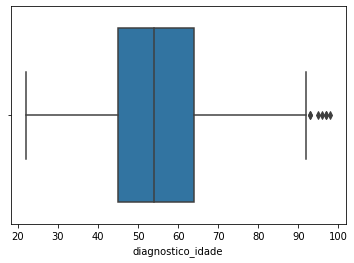

In [356]:
sns.boxplot(x = df_demograficos['diagnostico_idade'])

<AxesSubplot:xlabel='quantas_vezes_gravida'>

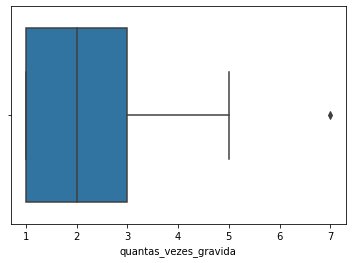

In [357]:
sns.boxplot(x = df_demograficos['quantas_vezes_gravida'])

<AxesSubplot:xlabel='idade_primeira_gestacao'>

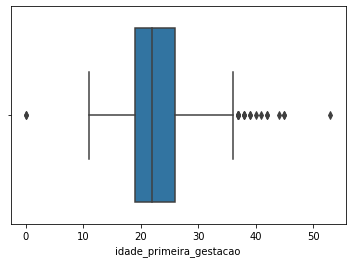

In [358]:
sns.boxplot(x = df_demograficos['idade_primeira_gestacao'])

<AxesSubplot:xlabel='periodo_amamentacao'>

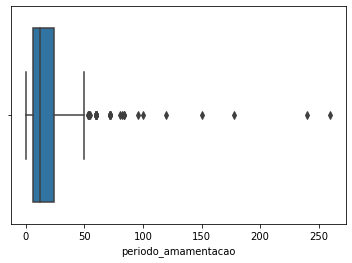

In [359]:
sns.boxplot(x = df_demograficos['periodo_amamentacao'])

<AxesSubplot:xlabel='idade_primeira_menstruacao'>

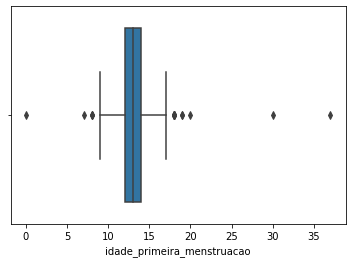

In [360]:
sns.boxplot(x = df_demograficos['idade_primeira_menstruacao']) 

####Aplicação da função excluir_outliers 
Eliminando Outliers das colunas passandas por parâmetro levando em consideração o desvio padrão

In [361]:
numerical_cols = ['diagnostico_idade', 
                  'quantas_vezes_gravida', 
                  'idade_primeira_gestacao', 
                  'idade_primeira_menstruacao']

def exclui_outliers(DataFrame, col_name):
  intervalo = 3*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df_demograficos[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df_demograficos[col_name] > (media + intervalo), col_name] = np.nan

for col in numerical_cols:
  exclui_outliers(df_demograficos, col)

<AxesSubplot:xlabel='diagnostico_idade'>

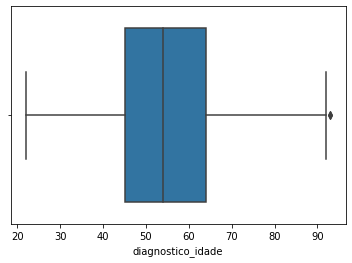

In [362]:
sns.boxplot(x = df_demograficos['diagnostico_idade'])

<AxesSubplot:xlabel='quantas_vezes_gravida'>

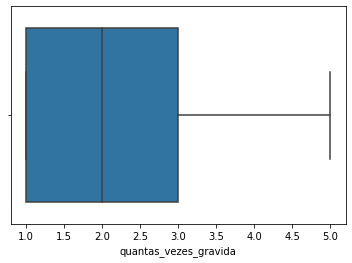

In [363]:
sns.boxplot(x = df_demograficos['quantas_vezes_gravida'])

<AxesSubplot:xlabel='idade_primeira_gestacao'>

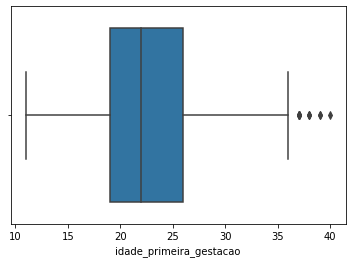

In [364]:
sns.boxplot(x = df_demograficos['idade_primeira_gestacao'])

<AxesSubplot:xlabel='idade_primeira_menstruacao'>

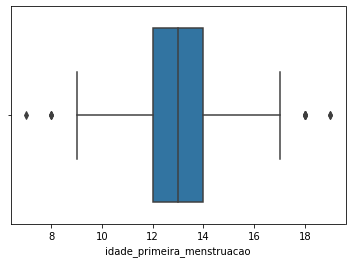

In [365]:
sns.boxplot(x = df_demograficos['idade_primeira_menstruacao']) 

In [366]:
df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 0 to 4271
Data columns (total 28 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   record_id                                                                                                         4272 non-null   int64  
 1   escolaridade                                                                                                      4057 non-null   object 
 2   diagnostico_idade                                                                                                 4087 non-null   float64
 3   sexo                                                                                                              4125 non-null   object 
 4   data_ultimo_dado_paciente     

<AxesSubplot:xlabel='diagnostico_idade', ylabel='escolaridade'>

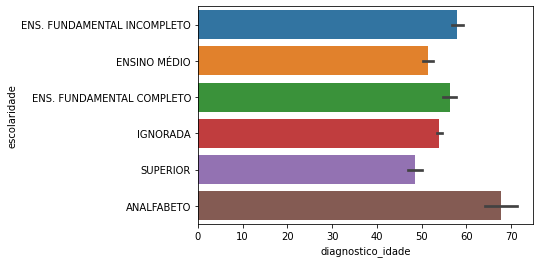

In [367]:
sns.barplot(x = df_demograficos['diagnostico_idade'], y = df_demograficos['escolaridade'])

###Codificação das colunas para a predição do modelo

O encoding é importante porque permite que dados categóricos sejam convertidos em dados numéricos, o que é necessário para que possam ser utilizados em algoritmos de aprendizado de máquina. Isso ocorre porque a maioria dos algoritmos de aprendizado de máquina requer que os dados sejam numéricos, pois eles são mais fáceis de serem manipulados e processados pelos algoritmos. Além disso, a escolha do tipo de codificação a ser aplicada depende do tipo de dados categóricos que está sendo trabalhado e do tipo de algoritmo de aprendizado de máquina que será utilizado. Portanto, a realização do encoding é essencial para garantir a eficácia e precisão dos algoritmos de aprendizado de máquina que utilizam esses dados.

#### Escolaridade

In [368]:
df_demograficos['escolaridade'].unique()

array(['ENS. FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO',
       'ENS. FUNDAMENTAL COMPLETO', 'IGNORADA', 'SUPERIOR', 'ANALFABETO',
       nan], dtype=object)

In [369]:
df_demograficos['escolaridade'].value_counts()

IGNORADA                       2535
ENSINO MÉDIO                    488
ENS. FUNDAMENTAL INCOMPLETO     445
ENS. FUNDAMENTAL COMPLETO       357
SUPERIOR                        174
ANALFABETO                       58
Name: escolaridade, dtype: int64

In [370]:
# ANALFABETO = 1
# ENS. FUNDAMENTAL INCOMPLETO = 2 
# ENS. FUNDAMENTAL COMPLETO = 3
# ENS. MEDIO = 4
# SUPERIOR = 5

df_demograficos['escolaridade'] = df_demograficos['escolaridade'].replace('IGNORADA', np.nan)

df_demograficos['escolaridade'] = df_demograficos['escolaridade'].replace({'ANALFABETO':0,
                                                                           'ENS. FUNDAMENTAL INCOMPLETO':1,
                                                                           'ENS. FUNDAMENTAL COMPLETO':2,
                                                                           'ENSINO MÉDIO':3,
                                                                           'SUPERIOR':4})

####Sexo

In [371]:
df_demograficos['sexo'].unique()

array(['Feminino', nan, 'Masculino'], dtype=object)

In [372]:
df_demograficos['sexo'].value_counts()

Feminino     4090
Masculino      35
Name: sexo, dtype: int64

In [373]:
# Masculino = 0
# Feminino = 1

df_demograficos['sexo'] = df_demograficos['sexo'].fillna(1)

df_demograficos['sexo'] = df_demograficos['sexo'].replace({'Masculino':0,
                                                           'Feminino':1})

####Ultimo dado do paciente

In [374]:
df_demograficos['ultimo_dado_paciente'].unique()

array(['Obito por câncer', 'Vivo, SOE', 'Vivo, com câncer',
       'Óbito por outras causas, SOE', nan], dtype=object)

In [375]:
df_demograficos['ultimo_dado_paciente'].value_counts()

Vivo, SOE                       2815
Obito por câncer                1131
Vivo, com câncer                 235
Óbito por outras causas, SOE      89
Name: ultimo_dado_paciente, dtype: int64

In [376]:
# Vivo, SEO = 3
# Vivo, com câncer = 2
# Obito por câncer = 1
# Óbito por outras causas = 0

df_demograficos['ultimo_dado_paciente'] = df_demograficos['ultimo_dado_paciente'].replace({'Vivo, SOE': 3,
                                                                                           'Vivo, com câncer':2,
                                                                                           'Obito por câncer':1,
                                                                                           'Óbito por outras causas, SOE':0,
})

####Ja engravidou

In [377]:
df_demograficos['ja_engravidou'].unique()

array([nan, 'Sim', 'Não'], dtype=object)

In [378]:
df_demograficos['ja_engravidou'].value_counts()

Sim    1002
Não      11
Name: ja_engravidou, dtype: int64

In [379]:
# Não = 0
# Sim = 1

df_demograficos['ja_engravidou'] = df_demograficos['ja_engravidou'].replace({'Não':0,
                                                                             'Sim':1
})

####Amamentou na gestacao

In [380]:
df_demograficos['amamentou_na_gestacao'].unique()

array([nan, 'Sim', 'Não'], dtype=object)

In [381]:
df_demograficos['amamentou_na_gestacao'].value_counts()

Sim    789
Não    253
Name: amamentou_na_gestacao, dtype: int64

In [382]:
# Não = 0
# Sim = 1

df_demograficos['amamentou_na_gestacao'] = df_demograficos['amamentou_na_gestacao'].replace({'Não':0,
                                                                                             'Sim':1})

####Historico Familiar

In [383]:
df_demograficos['possui_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria'].unique()

array(['Unchecked', 'Checked'], dtype=object)

In [384]:
df_demograficos['possui_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria'].value_counts()

Unchecked    4232
Checked        40
Name: possui_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria, dtype: int64

In [385]:
# Unchecked = 0
# Checked = 1
df_demograficos['possui_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria'] = df_demograficos['possui_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria'].replace({'Unchecked':0,
                                                                                                                                                                                                                                                                 'Checked':1
})

In [386]:
df_demograficos['possui_mais_de_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria'].unique()

array(['Unchecked', 'Checked'], dtype=object)

In [387]:
df_demograficos['possui_mais_de_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria'].value_counts()

Unchecked    4264
Checked         8
Name: possui_mais_de_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria, dtype: int64

In [388]:
# Unchecked = 0
# Checked = 1
df_demograficos['possui_mais_de_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria'] = df_demograficos['possui_mais_de_um_caso_historico_familiar_primeiro_grau_relacionado_sindrome_cancer_de_mama_e_ovario_hereditaria'].replace({'Unchecked':0,
                                                                                                                                                                                                                                                                 'Checked':1
})

####Pratica atividade fisica

In [389]:
df_demograficos['pratica_atividade_fisica'].unique()

array([nan, 'Pratica regularmente', 'Não pratica',
       'Pratica esporadicamente', 'Pratica frequentemente'], dtype=object)

In [390]:
df_demograficos['pratica_atividade_fisica'].value_counts()

Não pratica                223
Pratica regularmente        43
Pratica esporadicamente     23
Pratica frequentemente      16
Name: pratica_atividade_fisica, dtype: int64

In [391]:
# Não pratica = 0 
# Pratica esporadicamente = 1
# Pratica regularmente = 2
# Pratica frequentemente = 3


df_demograficos['pratica_atividade_fisica'] = df_demograficos['pratica_atividade_fisica'].replace({'Não pratica':0,
                                                                                                   'Pratica esporadicamente':1,
                                                                                                   'Pratica regularmente':2,
                                                                                                   'Pratica frequentemente':3
                                                                                                   })

####Consome tabaco

In [392]:
df_demograficos['consome_tabaco'].unique()

array([nan, 'Nunca fumou', 'Fumou no passado', 'Fuma atualmente',
       'não-informado'], dtype=object)

In [393]:
df_demograficos['consome_tabaco'].value_counts()

Nunca fumou         148
Fumou no passado     34
Fuma atualmente      27
não-informado         3
Name: consome_tabaco, dtype: int64

In [394]:
# Nunca fumou = 0
# Fumou no passado = 1
# Fuma atualmente = 2

df_demograficos['consome_tabaco'] = df_demograficos['consome_tabaco'].replace('não-informado', np.nan)

df_demograficos['consome_tabaco'] = df_demograficos['consome_tabaco'].replace({'Nunca fumou':0,
                                                                                 'Fumou no passado':1,
                                                                                 'Fuma atualmente':2})

####Consome alcool

In [395]:
df_demograficos['consome_alcool'].unique()

array([nan, 'Bebe atualmente', 'Bebia no passado', 'Nunca bebeu',
       'não-informado'], dtype=object)

In [396]:
df_demograficos['consome_alcool'].value_counts()

Nunca bebeu         159
Bebia no passado     35
Bebe atualmente       6
não-informado         4
Name: consome_alcool, dtype: int64

In [397]:
# Nunca bebeu = 0
# Bebeu no passado = 1
# Bebe atualmente = 2

df_demograficos['consome_alcool'] = df_demograficos['consome_alcool'].replace('não-informado', np.nan)

df_demograficos['consome_alcool'] = df_demograficos['consome_alcool'].replace({'Nunca bebeu':0,
                                                                               'Bebia no passado':1,
                                                                               'Bebe atualmente':2})

####Historico familiar de cancer

In [398]:
df_demograficos['historico_familiar_cancer'].unique()

array([nan, 'Sim', 'Não'], dtype=object)

In [399]:
df_demograficos['historico_familiar_cancer'].value_counts()

Sim    138
Não     52
Name: historico_familiar_cancer, dtype: int64

In [400]:
# Não = 0
# Sim = 1

df_demograficos['historico_familiar_cancer'] = df_demograficos['historico_familiar_cancer'].replace({'Não':0,
                                                                                                     'Sim':1})

####Grau parentesco com cancer

In [401]:
df_demograficos['parentes_primeiro_grau_com_cancer'].unique()

array(['Unchecked', 'Checked'], dtype=object)

In [402]:
df_demograficos['parentes_primeiro_grau_com_cancer'].value_counts()

Unchecked    4183
Checked        89
Name: parentes_primeiro_grau_com_cancer, dtype: int64

In [403]:
# Unchecked = 0
# Checked = 1

df_demograficos['parentes_primeiro_grau_com_cancer'] = df_demograficos['parentes_primeiro_grau_com_cancer'].replace({'Unchecked':0,
                                                                                                                     'Checked':1
                                                                                                                     })

In [404]:
df_demograficos['parentes_segundo_grau_com_cancer'].unique()

array(['Unchecked', 'Checked'], dtype=object)

In [405]:
df_demograficos['parentes_segundo_grau_com_cancer'].value_counts()

Unchecked    4202
Checked        70
Name: parentes_segundo_grau_com_cancer, dtype: int64

In [406]:
# Unchecked = 0
# Checked = 1

df_demograficos['parentes_segundo_grau_com_cancer'] = df_demograficos['parentes_segundo_grau_com_cancer'].replace({'Unchecked':0,
                                                                                                                     'Checked':1
                                                                                                                     })

In [407]:
df_demograficos['parentes_terceiro_grau_com_cancer'].unique()

array(['Unchecked', 'Checked'], dtype=object)

In [408]:
df_demograficos['parentes_terceiro_grau_com_cancer'].value_counts()

Unchecked    4224
Checked        48
Name: parentes_terceiro_grau_com_cancer, dtype: int64

In [409]:
# Unchecked = 0
# Checked = 1

df_demograficos['parentes_terceiro_grau_com_cancer'] = df_demograficos['parentes_terceiro_grau_com_cancer'].replace({'Unchecked':0,
                                                                                                                     'Checked':1
                                                                                                                     })

####Regime de tratamento (utilizacao do onehotencoder)

In [410]:
df_demograficos['regime_tratamento'].unique()

array([nan, 'Terapia Adjuvante', 'Terapia Neoadjuvante', 'Paliativo',
       'Não fez quimioterapia'], dtype=object)

In [411]:
df_demograficos['regime_tratamento'].value_counts()

Terapia Adjuvante        1422
Terapia Neoadjuvante     1346
Paliativo                  70
Não fez quimioterapia      25
Name: regime_tratamento, dtype: int64

In [412]:
df_demograficos = pd.get_dummies(df_demograficos, columns=['regime_tratamento'])
df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 0 to 4271
Data columns (total 31 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   record_id                                                                                                         4272 non-null   int64  
 1   escolaridade                                                                                                      1522 non-null   float64
 2   diagnostico_idade                                                                                                 4087 non-null   float64
 3   sexo                                                                                                              4272 non-null   int64  
 4   data_ultimo_dado_paciente     

####Tipo de terapia anti her2

In [413]:
df_demograficos['tipo_terapia_anti_her2_neoadjuvante'].unique()

array(['Trastuzumabe', nan, 'Trastuzumabe + Pertuzumabe'], dtype=object)

In [414]:
df_demograficos['tipo_terapia_anti_her2_neoadjuvante'].value_counts()

Trastuzumabe                  1130
Trastuzumabe + Pertuzumabe       4
Name: tipo_terapia_anti_her2_neoadjuvante, dtype: int64

In [415]:
df_demograficos['tipo_terapia_anti_her2_neoadjuvante'] = df_demograficos['tipo_terapia_anti_her2_neoadjuvante'].replace({'Trastuzumabe':0,
                                                                                                                         'Trastuzumabe + Pertuzumabe':1})

####Radioterapia

In [416]:
df_demograficos['radioterapia'].unique()

array([nan, 'Sim'], dtype=object)

In [417]:
df_demograficos['radioterapia'].value_counts()

Sim    2325
Name: radioterapia, dtype: int64

In [418]:
# Não = 0
# Sim = 1

df_demograficos['radioterapia'] = df_demograficos['radioterapia'].fillna(0)
df_demograficos['radioterapia'] = df_demograficos['radioterapia'].replace({'Sim':1})

###Trantando os missing numbers de algumas colunas
NaN (Not a Number) é um valor especial em Python que representa a ausência de um valor numérico. Quando se lida com dados, é comum encontrar valores NaN em um conjunto de dados. O tratamento de NaN é importante para evitar erros em análises e modelagem de dados.

In [419]:
df_demograficos_num = ['diagnostico_idade',
                       'tempo_de_seguimento',
                       'idade_primeira_menstruacao',
]

df_demograficos_cat = [
  'escolaridade',
  'ultimo_dado_paciente',
  'tipo_terapia_anti_her2_neoadjuvante'
]

for col in df_demograficos_num:
  replace_nan(df_demograficos, col, False)

for col in df_demograficos_cat:
  replace_nan(df_demograficos, col, True)

df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 0 to 4271
Data columns (total 31 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   record_id                                                                                                         4272 non-null   int64  
 1   escolaridade                                                                                                      4272 non-null   float64
 2   diagnostico_idade                                                                                                 4272 non-null   float64
 3   sexo                                                                                                              4272 non-null   int64  
 4   data_ultimo_dado_paciente     

## DataFrame(Histopatologia)

###Exploração inicial

In [420]:
df_histopatologia.head()

,Record ID,Repeat Instrument,Repeat Instance,Diagnostico primario (tipo histológico),Grau histológico,Subtipo tumoral,Receptor de estrogênio,Receptor de progesterona,Ki67 (>14%),Receptor de progesterona (quantificação %),Receptorde Estrogênio (quantificação %),Indice H (Receptorde progesterona),HER2 por IHC,HER2 por FISH,Ki67 (%)
0,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302,Dados Histopatologicos Mama,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
2,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,710,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,20.0
4,752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
df_histopatologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9066 entries, 0 to 9065
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Record ID                                   9066 non-null   int64  
 1   Repeat Instrument                           4794 non-null   object 
 2   Repeat Instance                             4794 non-null   float64
 3   Diagnostico primario (tipo histológico)     2954 non-null   object 
 4   Grau histológico                            1467 non-null   float64
 5   Subtipo tumoral                             4695 non-null   float64
 6   Receptor de estrogênio                      4249 non-null   object 
 7   Receptor de progesterona                    4251 non-null   object 
 8   Ki67 (>14%)                                 4022 non-null   object 
 9   Receptor de progesterona (quantificação %)  1890 non-null   object 
 10  Receptorde E

In [422]:
df_histopatologia.shape

(9066, 15)

In [423]:
df_histopatologia.describe()

,Record ID,Repeat Instance,Grau histológico,Subtipo tumoral,Indice H (Receptorde progesterona),Ki67 (%)
count,9066.00,4794.00,1467.00,4695.00,592.00,3867.00
mean,48865.55,1.14,2.26,2.96,197.09,36.53
std,20440.35,0.64,0.65,1.30,98.49,24.56
min,302.00,1.00,1.00,1.00,0.00,0.00
25%,31383.00,1.00,2.00,2.00,120.00,18.00
50%,53990.00,1.00,2.00,3.00,240.00,30.00
75%,65140.00,1.00,3.00,4.00,285.00,50.00
max,82240.00,17.00,3.00,5.00,300.00,100.00


<AxesSubplot:title={'center':' Grau histológico x Ki67 (%)'}, xlabel='Grau histológico', ylabel='Ki67 (%)'>

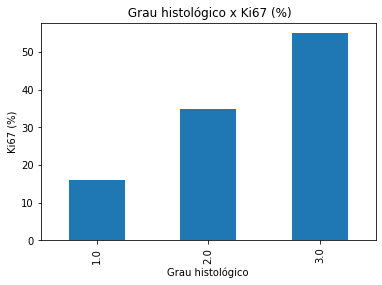

In [424]:
df_agrupado = df_histopatologia.groupby("Grau histológico")
df_agrupado['Ki67 (%)'].mean().plot(kind='bar', ylabel='Ki67 (%)', xlabel='Grau histológico', title=" Grau histológico x Ki67 (%)")

<AxesSubplot:title={'center':'Progesterona inicial x ki67 inicial'}, xlabel='Progesterona inicial', ylabel='ki67 inicial'>

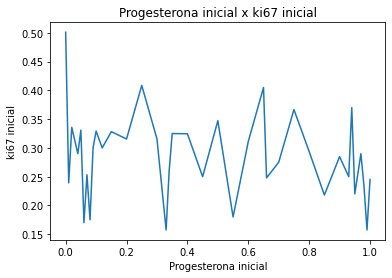

In [425]:
df_agrupado_ki67 = df.groupby("progesterona_quantificacao_inicial")
df_agrupado_ki67['ki67_inicial'].mean().plot(kind='line', ylabel='ki67 inicial', xlabel='Progesterona inicial', title="Progesterona inicial x ki67 inicial")

###Limpeza dos Dados

####Deletando algumas colunas
**repeat_instrument** - Motivo: único dado que tinha nele era "Dados Histopatologicos Mama", algo que não ajuda com a precisão e ao fazer merge não será relevante

**her2_fish** - Motivo: Poucos dados preenchidos

In [426]:
df_histopatologia = df_histopatologia.drop(columns=['Repeat Instrument',
                                                    'HER2 por FISH'])

####Removendo todas as linhas que só tinham o record_id

In [427]:
df_histopatologia = df_histopatologia.dropna(subset=list(df_histopatologia.columns)[1:], how='all')
#Confirmando o resultado
df_histopatologia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4794 entries, 1 to 9065
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Record ID                                   4794 non-null   int64  
 1   Repeat Instance                             4794 non-null   float64
 2   Diagnostico primario (tipo histológico)     2954 non-null   object 
 3   Grau histológico                            1467 non-null   float64
 4   Subtipo tumoral                             4695 non-null   float64
 5   Receptor de estrogênio                      4249 non-null   object 
 6   Receptor de progesterona                    4251 non-null   object 
 7   Ki67 (>14%)                                 4022 non-null   object 
 8   Receptor de progesterona (quantificação %)  1890 non-null   object 
 9   Receptorde Estrogênio (quantificação %)     2166 non-null   object 
 10  Indice H (Re

#### Simplificando os nomes das colunas

In [428]:
df_histopatologia = df_histopatologia.rename(columns={
  "Record ID": "record_id",
  "Repeat Instrument": "repeat_instrument",
  "Repeat Instance": "repeat_instance",
  "Diagnostico primario (tipo histológico)": "diagnostico_primario",
  "Grau histológico": "grau_histologico", 
  "Subtipo tumoral": "subtipo_tumoral",
  "Receptor de estrogênio": "estrogenio",
  "Receptor de progesterona": "progesterona",
  "Ki67 (>14%)": "ki67_14",
  "Receptor de progesterona (quantificação %)": "progesterona_quantificacao",
  "Receptorde Estrogênio (quantificação %)": "estrogenio_quantificacao",
  "Indice H (Receptorde progesterona)": "indice_h",
  "HER2 por IHC": "her2_ihc",
  "HER2 por FISH": "her2_fish",
  "Ki67 (%)": "ki67"
})

#Confirmando alteração dos nomes das colunas
df_histopatologia.head()

,record_id,repeat_instance,diagnostico_primario,grau_histologico,subtipo_tumoral,estrogenio,progesterona,ki67_14,progesterona_quantificacao,estrogenio_quantificacao,indice_h,her2_ihc,ki67
1,302,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN
3,710,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),20.0
5,752,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN
7,1367,1.0,NaN,NaN,2.0,positivo,positivo,positivo,5,60,10.0,0 (negativo),40.0
8,1367,2.0,NaN,NaN,5.0,positivo,negativo,positivo,NaN,30,NaN,+++ (positivo),40.0


#####Formatando decimais

In [429]:
#Formatando os números para ter 2 casas decimais somente
pd.set_option('display.precision', 2)
#Verificação
df_histopatologia.describe()

,record_id,repeat_instance,grau_histologico,subtipo_tumoral,indice_h,ki67
count,4794.00,4794.00,1467.00,4695.00,592.00,3867.00
mean,49055.52,1.14,2.26,2.96,197.09,36.53
std,20243.31,0.64,0.65,1.30,98.49,24.56
min,302.00,1.00,1.00,1.00,0.00,0.00
25%,31635.75,1.00,2.00,2.00,120.00,18.00
50%,54292.50,1.00,2.00,3.00,240.00,30.00
75%,64659.50,1.00,3.00,4.00,285.00,50.00
max,82240.00,17.00,3.00,5.00,300.00,100.00


###Codificação das colunas para a predição do modelo

In [430]:
df_histopatologia['ki67_14'] = df_histopatologia['ki67_14'].replace({'negativo':0,
                                                                     'positivo':1})

In [431]:
df_histopatologia['her2_ihc'] = df_histopatologia['her2_ihc'].replace({'0 (negativo)':0,
                                                                       ' ++ (duvidoso)':0,
                                                                       ' + (negativo)':0,
                                                                       'indeterminado':0,
                                                                       ' +++ (positivo)':1
                                                                       })

In [432]:
df_histopatologia = pd.get_dummies(df_histopatologia, columns=['diagnostico_primario'])
df_histopatologia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4794 entries, 1 to 9065
Data columns (total 30 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   record_id                                                                         4794 non-null   int64  
 1   repeat_instance                                                                   4794 non-null   float64
 2   grau_histologico                                                                  1467 non-null   float64
 3   subtipo_tumoral                                                                   4695 non-null   float64
 4   estrogenio                                                                        4249 non-null   object 
 5   progesterona                                                                      4251 non-null   object 
 6   

###Trantando os missing numbers de algumas colunas

In [433]:
df_histopatologia['ki67_14'].unique()

array([nan, 1, 0, 'não realizado', 'inconclusivo'], dtype=object)

In [434]:
df_histopatologia['ki67_14'].value_counts()

1                3355
0                 650
não realizado      10
inconclusivo        7
Name: ki67_14, dtype: int64

In [435]:
df_histopatologia['ki67_14'] = df_histopatologia['ki67_14'].replace('não realizado', np.nan)
df_histopatologia['ki67_14'] = df_histopatologia['ki67_14'].replace('inconclusivo', np.nan)

In [436]:
df_h_t = pd.merge(df_histopatologia.copy(), df_demograficos.copy(), how='left')
df_h_t[df_h_t['estrogenio'] == 'positivo']['ki67'].value_counts(dropna=False)
df_h_t['ki67'].describe()

count    3867.00
mean       36.53
std        24.56
min         0.00
25%        18.00
50%        30.00
75%        50.00
max       100.00
Name: ki67, dtype: float64

In [437]:
df_h_t = pd.merge(df_histopatologia.copy(), df_demograficos.copy(), how='left')
df_h_t = df_h_t.dropna(subset=['grau_histologico', 'estrogenio', 'progesterona', 'progesterona_quantificacao', 'estrogenio_quantificacao', 'indice_h'], how='all')
df_h_t = df_h_t.dropna(subset=['estrogenio', 'progesterona', 'ki67_14',	'progesterona_quantificacao',	'estrogenio_quantificacao',	'indice_h'], how='all')

df_h_t.loc[((df_h_t['estrogenio'].isna()) | (df_h_t['estrogenio'] == 'inconclusivo')) & (df_h_t['progesterona'] == 'positivo'), 'estrogenio'] = 'positivo'
df_h_t.loc[((df_h_t['estrogenio'].isna()) | (df_h_t['estrogenio'] == 'inconclusivo')) & (df_h_t['progesterona'] == 'negativo'), 'estrogenio'] = 'negativo'

df_h_t.loc[((df_h_t['progesterona'].isna()) | (df_h_t['progesterona'] == 'inconclusivo')) & (df_h_t['estrogenio'] == 'positivo'), 'progesterona'] = 'positivo'
df_h_t.loc[((df_h_t['progesterona'].isna()) | (df_h_t['progesterona'] == 'inconclusivo')) & (df_h_t['estrogenio'] == 'negativo'), 'progesterona'] = 'negativo'

# ESTROGENIO = NEGATIVO - ESTROGENIO QUANTIFICACAO
# As celulas com estrogenio = negativo são células incapazes de receber estrogênio. Portanto, todos os casos em que a quantificação for 'neg' ou 'NEG', troquei por 0
df_h_t.loc[(df_h_t['estrogenio_quantificacao'] == 'neg') & (df_h_t['estrogenio'] == 'negativo'), 'estrogenio_quantificacao'] = 0
df_h_t.loc[(df_h_t['estrogenio_quantificacao'] == 'NEG') & (df_h_t['estrogenio'] == 'negativo'), 'estrogenio_quantificacao'] = 0

# Os casos onde a quantificação é NaN e o estrogenio é negativo, tratei como 0, que é a imensa maioria dos casos
df_h_t.loc[(df_h_t['estrogenio_quantificacao'].isna()) & (df_h_t['estrogenio'] == 'negativo'), 'estrogenio_quantificacao'] = 0

# ESTROGENIO = POSITIVO - ESTROGENIO QUANTIFICACAO
# Os registros estranhos fiz que recebessem a moda (1)
df_h_t.loc[(df_h_t['estrogenio_quantificacao'].isna()) & (df_h_t['estrogenio'] == 'positivo'), 'estrogenio_quantificacao'] = 1
df_h_t.loc[(df_h_t['estrogenio_quantificacao'] == '0') & (df_h_t['estrogenio'] == 'positivo'), 'estrogenio_quantificacao'] = 1
df_h_t.loc[(df_h_t['estrogenio_quantificacao'] == 'neg') & (df_h_t['estrogenio'] == 'positivo'), 'estrogenio_quantificacao'] = 1
# Valor entre 1-10 é a média (5)
df_h_t.loc[(df_h_t['estrogenio_quantificacao'] == '1-10') & (df_h_t['estrogenio'] == 'positivo'), 'estrogenio_quantificacao'] = 5

# PROGESTERONA
df_h_t.loc[(df_h_t['progesterona_quantificacao'] == '20-70'), 'progesterona_quantificacao'] = 45
df_h_t.loc[(df_h_t['progesterona_quantificacao'] == '70%'), 'progesterona_quantificacao'] = 70
df_h_t.loc[((df_h_t['progesterona_quantificacao'] == 'neg') | (df_h_t['progesterona_quantificacao'] == 'NEG') | (df_h_t['progesterona_quantificacao'].isna())) & (df_h_t['progesterona'] == 'negativo'),'progesterona_quantificacao'] = 0
df_h_t.loc[((df_h_t['progesterona_quantificacao'] == 'neg') | (df_h_t['progesterona_quantificacao'] == 'inconclusivo') | (df_h_t['progesterona_quantificacao'].isna())) & (df_h_t['progesterona'] == 'positivo'),'progesterona_quantificacao'] = 1

df_h_t.drop(df_h_t.loc[df_h_t['estrogenio'] == 'não realizado'].index, inplace=True)

# ki67 - Preenche NaNs de acordo com a média em 4 grupos considerando as variáveis estrogenio e progesterona (ambos positivo ou negativo)
df_h_t.loc[(df_h_t['estrogenio'] == 'positivo') & (df_h_t['progesterona'] == 'negativo') & (df_h_t['ki67'].isna()), 'ki67'] = df_h_t[(df_h_t['estrogenio'] == 'positivo') & (df_h_t['progesterona'] == 'negativo')]['ki67'].mean()
df_h_t.loc[(df_h_t['estrogenio'] == 'negativo') & (df_h_t['progesterona'] == 'positivo') & (df_h_t['ki67'].isna()), 'ki67'] = df_h_t[(df_h_t['estrogenio'] == 'negativo') & (df_h_t['progesterona'] == 'positivo')]['ki67'].mean()
df_h_t.loc[(df_h_t['estrogenio'] == 'positivo') & (df_h_t['progesterona'] == 'positivo') & (df_h_t['ki67'].isna()), 'ki67'] = df_h_t[(df_h_t['estrogenio'] == 'positivo') & (df_h_t['progesterona'] == 'positivo')]['ki67'].mean()
df_h_t.loc[(df_h_t['estrogenio'] == 'negativo') & (df_h_t['progesterona'] == 'negativo') & (df_h_t['ki67'].isna()), 'ki67'] = df_h_t[(df_h_t['estrogenio'] == 'negativo') & (df_h_t['progesterona'] == 'negativo')]['ki67'].mean()


df_h_t['estrogenio_quantificacao'] = df_h_t['estrogenio_quantificacao'].astype(int)
df_h_t['progesterona_quantificacao'] = df_h_t['progesterona_quantificacao'].astype(int)
df_h_t['ki67'] = df_h_t['ki67'].astype(int)


df_histopatologia = df_h_t

####Transformando todas as linhas com o mesmo ID em uma linha unica

In [438]:
def normalize_hispatologia(data):
  return pd.DataFrame({
    'record_id': [data['record_id'].iloc[0]],
    'registros_hispatologicos': [data['record_id'].count()],
    'subtipo_tumoral_inicial': [data['subtipo_tumoral'].iloc[0]],
    'subtipo_tumoral_final': [data['subtipo_tumoral'].iloc[-1]],
    'estrogenio': ['positivo' in data['estrogenio'].values],
    'progesterona': ['positivo' in data['progesterona'].values],
    'ki67_14': ['positivo' in data['ki67_14'].values],
    'ki67_inicial': [data['ki67'].iloc[0]],
    'ki67_final': [data['ki67'].iloc[-1]],
    'progesterona_quantificacao_inicial': [data['progesterona_quantificacao'].iloc[0]],
    'progesterona_quantificacao_final': [data['progesterona_quantificacao'].iloc[-1]],
    'estrogenio_quantificacao_inicial': [data['estrogenio_quantificacao'].iloc[0]],
    'estrogenio_quantificacao_final': [data['estrogenio_quantificacao'].iloc[-1]],
    'indice_h_inicial': [data['indice_h'].iloc[0]],
    'indice_h_final': [data['indice_h'].iloc[-1]],
    'indice_h_inicial': [data['indice_h'].iloc[0]],
    'indice_h_final': [data['indice_h'].iloc[-1]],
    'her2_ihc_inicial': [data['her2_ihc'].iloc[0]],
    'her2_ihc_final': [data['her2_ihc'].iloc[-1]],
  })

df_histopatologia_grouped = df_histopatologia.groupby('record_id', group_keys=False)
df_histopatologia_grouped = df_histopatologia_grouped.apply(normalize_hispatologia)

df_histopatologia_grouped['progesterona_quantificacao_inicial'] = df_histopatologia_grouped['progesterona_quantificacao_inicial'].astype(int)
df_histopatologia_grouped['progesterona_quantificacao_final'] = df_histopatologia_grouped['progesterona_quantificacao_final'].astype(int)
df_histopatologia_grouped['estrogenio_quantificacao_inicial'] = df_histopatologia_grouped['estrogenio_quantificacao_inicial'].astype(int)
df_histopatologia_grouped['estrogenio_quantificacao_final'] = df_histopatologia_grouped['estrogenio_quantificacao_final'].astype(int)
df_histopatologia_grouped['ki67_inicial'] = df_histopatologia_grouped['ki67_inicial'].astype(int)
df_histopatologia_grouped['ki67_final'] = df_histopatologia_grouped['ki67_final'].astype(int)

df_histopatologia_grouped

<ipython-input-438-cd90c68a3547>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  'ki67_14': ['positivo' in data['ki67_14'].values],


,record_id,registros_hispatologicos,subtipo_tumoral_inicial,subtipo_tumoral_final,estrogenio,progesterona,ki67_14,ki67_inicial,ki67_final,progesterona_quantificacao_inicial,progesterona_quantificacao_final,estrogenio_quantificacao_inicial,estrogenio_quantificacao_final,indice_h_inicial,indice_h_final,her2_ihc_inicial,her2_ihc_final
0,302,1,5.0,5.0,True,True,False,26,26,1,1,1,1,NaN,NaN,1.0,1.0
0,710,1,2.0,2.0,True,False,False,20,20,0,0,1,1,NaN,NaN,0.0,0.0
0,1367,2,2.0,5.0,True,True,False,40,40,5,0,60,30,10.0,NaN,0.0,1.0
0,1589,1,5.0,5.0,True,True,False,26,26,1,1,1,1,NaN,NaN,1.0,1.0
0,1705,1,4.0,4.0,False,False,False,55,55,0,0,0,0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,82077,1,2.0,2.0,True,True,False,15,15,1,1,1,1,NaN,NaN,0.0,0.0
0,82098,1,2.0,2.0,True,True,False,15,15,1,1,1,1,NaN,NaN,0.0,0.0
0,82122,2,2.0,5.0,True,True,False,40,60,60,10,80,80,NaN,NaN,0.0,1.0
0,82205,1,4.0,4.0,False,False,False,90,90,0,0,0,0,NaN,NaN,0.0,0.0


Função para tratamento de missing numbers com base em uma distribuição normal

In [439]:
df_histopatologia_num = [
]

df_histopatologia_cat = ['grau_histologico',
                         'subtipo_tumoral',
                         'ki67_14',
                         'her2_ihc'
]

for col in df_histopatologia_num:
  replace_nan(df_histopatologia, col, False)

for col in df_histopatologia_cat:
  replace_nan(df_histopatologia, col, True)

df_histopatologia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4258 entries, 0 to 4793
Data columns (total 60 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   record_id                                                                                                         4258 non-null   int64  
 1   repeat_instance                                                                                                   4258 non-null   float64
 2   grau_histologico                                                                                                  4258 non-null   float64
 3   subtipo_tumoral                                                                                                   4258 non-null   float64
 4   estrogenio                    

## DataFrame(Peso & Altura)

### Exploração inicial

In [440]:
df_peso_altura.head()

,Record ID,Repeat Instrument,Repeat Instance,Data:,Peso,Altura (em centimetros),IMC
0,302,NaN,NaN,NaN,NaN,NaN,NaN
1,302,Dados Antropometricos,1.0,2009-03-06,58.0,NaN,inf
2,302,Dados Antropometricos,2.0,2009-01-23,57.0,158.0,22.8
3,302,Dados Antropometricos,3.0,2009-02-06,57.0,158.0,22.8
4,302,Dados Antropometricos,4.0,2009-12-25,62.0,158.0,24.8


In [441]:
df_peso_altura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55654 entries, 0 to 55653
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Record ID                55654 non-null  int64  
 1   Repeat Instrument        51382 non-null  object 
 2   Repeat Instance          51382 non-null  float64
 3   Data:                    51354 non-null  object 
 4   Peso                     45178 non-null  float64
 5   Altura (em centimetros)  49928 non-null  float64
 6   IMC                      51334 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ MB


In [442]:
df_peso_altura.shape

(55654, 7)

In [443]:
df_peso_altura.describe()

,Record ID,Repeat Instance,Peso,Altura (em centimetros),IMC
count,55654.00,51382.00,45178.00,49928.00,51334.0
mean,45533.98,11.50,71.24,157.20,inf
std,22306.21,10.15,241.74,7.23,NaN
min,302.00,1.00,1.00,0.00,0.0
25%,24532.00,4.00,59.65,152.00,22.9
50%,50868.00,9.00,68.35,157.00,27.1
75%,63162.00,16.00,78.60,162.00,31.2
max,82240.00,96.00,51350.00,191.00,inf


###Limpeza dos dados

####Organiza as entradas de cada Record ID por data

In [444]:
df_peso_altura = df_peso_altura.rename(columns={df_peso_altura.columns[3]: 'data'})
df_peso_altura = df_peso_altura.sort_values(by=["Record ID", "data"])

####Remove as linhas que estão totalmente vazias com excessão do Record ID

In [445]:
df_peso_altura = df_peso_altura.dropna(subset=['Repeat Instance']).reset_index(drop=True)

####Cria as colunas necessárias para guardar o resumo das informações em uma linha

In [446]:
df_peso_altura["peso_maximo"] = ''
df_peso_altura["peso_minimo"] = ''
df_peso_altura["imc_maximo"] = ''
df_peso_altura["imc_minimo"] = ''

####Muda o tipo da feature data de object pra datetime

In [447]:
df_peso_altura['data'] = df_peso_altura['data'].astype('datetime64')

####Função que lida com todos os outliers e todos os Nan

In [448]:
# Sua execução dura por volta de 30s, dependendo da internet

contagem = 0
def tira_na(id, df):
  global contagem
  # Trata a coluna de altura
  if math.isnan(df.iloc[contagem, 5]) or df.iloc[contagem, 5] == 0:
    (df.loc[contagem, "Altura (em centimetros)"]) = df[(df["Record ID"] == id)]["Altura (em centimetros)"].median()
  if math.isnan(df.loc[contagem, "Altura (em centimetros)"]):
    (df.loc[contagem, "Altura (em centimetros)"]) = df["Altura (em centimetros)"].median()
  # Trata a coluna de peso
  if math.isnan(df.loc[contagem, "Peso"]) or df.loc[contagem, "Peso"] >= 150 or df.loc[contagem, "Peso"] <= 20:
    (df.loc[contagem, "Peso"]) = df[(df["Record ID"] == id)]["Peso"].median()
  if math.isnan(df.loc[contagem, "Peso"]) or df.loc[contagem, "Peso"] <= 20:
    (df.iloc[contagem, 4]) = df["Peso"].median()
  # Trata a coluna de IMC
  if math.isnan(df.loc[contagem, "IMC"]) or df.loc[contagem, "IMC"] >= 50 or df.loc[contagem, "IMC"] <= 10:
    (df.loc[contagem, "IMC"]) = (df.loc[contagem, "Peso"]) / ((df.iloc[contagem, 5] / 100) ** 2).round(1)
  contagem += 1
df_peso_altura["Record ID"].apply(tira_na, args=(df_peso_altura,))

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

0        None
1        None
2        None
3        None
4        None
         ... 
51377    None
51378    None
51379    None
51380    None
51381    None
Name: Record ID, Length: 51382, dtype: object

#### Função que comprime as várias linhas com record IDs repetidos em uma, visando perder a menor quantidade de informações possível

In [449]:
ja_foi = []
contagem = 0
def comprime_linhas(id, df, ja_foi):
  if id not in ja_foi:
    global contagem
    ja_foi.append(id)
    # Encontra os valores desejados
    df_filtrado = df[(df["Record ID"] == id)]
    peso_maximo = df_filtrado["Peso"].max()
    peso_minimo = df_filtrado["Peso"].min()
    imc_maximo = df_filtrado["IMC"].max()
    imc_minimo = df_filtrado["IMC"].min()
    altura = df_filtrado["Altura (em centimetros)"].median()

    # Passa os valores desejados para as suas devidas posições
    df.loc[contagem, "peso_maximo"] = peso_maximo
    df.loc[contagem, "peso_minimo"] = peso_minimo
    df.loc[contagem, "imc_maximo"] = imc_maximo
    df.loc[contagem, "imc_minimo"] = imc_minimo
    df.loc[contagem, "Altura (em centimetros)"] = altura

    # Atualiza a contagem para saber em qual index está trabalhando
    tamanho = df_filtrado.shape[0]
    contagem += tamanho
    

df_peso_altura["Record ID"].apply(comprime_linhas, args=(df_peso_altura, ja_foi))

0        None
1        None
2        None
3        None
4        None
         ... 
51377    None
51378    None
51379    None
51380    None
51381    None
Name: Record ID, Length: 51382, dtype: object

####Remove as linhas com Record IDs duplicados e muda nomes de colunas

In [450]:
df_peso_altura = df_peso_altura.drop_duplicates(subset=["Record ID"], keep="first", ignore_index=True, inplace=False).rename(columns={"Peso":"peso_inicial", "IMC": "imc_inicial", "Altura (em centimetros)": 'altura'})

#### Corrige o tipo de colunas numéricas que estavam classificadas como categóricas

In [451]:
df_peso_altura[['peso_maximo', 'peso_minimo', 'imc_maximo', 'imc_minimo']] = df_peso_altura[['peso_maximo', 'peso_minimo', 'imc_maximo', 'imc_minimo']].astype('float64')

#### Removendo colunas desnecessárias

In [452]:
df_peso_altura = df_peso_altura.drop(columns=['Repeat Instrument', 'Repeat Instance', 'data'])

In [453]:
df_peso_altura = clean_column_names(df_peso_altura)
df_peso_altura

,record_id,peso_inicial,altura,imc_inicial,peso_maximo,peso_minimo,imc_maximo,imc_minimo
0,302,57.80,158.0,23.2,64.90,56.00,26.0,22.4
1,710,61.00,155.0,25.1,66.00,60.50,27.5,25.1
2,752,84.00,152.0,36.4,85.90,81.00,37.2,35.1
3,1367,57.90,143.0,28.3,59.00,51.00,28.9,24.9
4,1589,63.20,167.0,22.7,67.00,62.00,24.0,22.2
...,...,...,...,...,...,...,...,...
3798,82123,85.40,153.0,36.5,85.40,77.30,36.5,32.6
3799,82124,81.10,151.0,35.6,81.10,78.00,35.6,34.2
3800,82131,71.40,156.0,29.2,75.65,71.40,31.1,29.2
3801,82205,135.85,174.0,44.9,140.00,124.10,47.3,41.0


## DataFrame(Registro de Tumor)

### Exploração inicial

In [454]:
df_registro_tumor.head(5)

,Record ID,Repeat Instrument,Repeat Instance,Data da primeira consulta institucional [dt_pci],Data do diagnóstico,Código da Topografia (CID-O),Código da Morfologia de acordo com o CID-O,Estadio Clínico,Grupo de Estadio Clínico,Classificação TNM Clínico - T,...,Local de Recidiva a distancia/ metastase #2 - CID-O - Topografia,Local de Recidiva a distancia/ metastase #3 - CID-O - Topografia,Local de Recidiva a distancia/ metastase #4 - CID-O - Topografia,Descrição da Morfologia de acordo com o CID-O (CID-O - 3ª edição),Descrição da Topografia,Classificação TNM Patológico - N,Classificação TNM Patológico - T,Com recidiva à distância,Com recidiva regional,Com recidiva local
0,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302,Registro De Tumores,1.0,2008-03-22,2008-03-23,C504,85003.0,IIA,II,2,...,NaN,NaN,NaN,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,NaN,NaN,Não,Não,Não
2,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,710,Registro De Tumores,1.0,2006-11-11,2007-11-11,C508,85003.0,IIIA,III,3,...,NaN,NaN,NaN,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA LESAO SOBREPOSTA DA,NaN,NaN,Não,Sim,Sim
4,752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [455]:
df_registro_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Record ID                                                           8949 non-null   int64  
 1   Repeat Instrument                                                   4677 non-null   object 
 2   Repeat Instance                                                     4677 non-null   float64
 3   Data da primeira consulta institucional [dt_pci]                    4677 non-null   object 
 4   Data do diagnóstico                                                 4677 non-null   object 
 5   Código da Topografia (CID-O)                                        4677 non-null   object 
 6   Código da Morfologia de acordo com o CID-O                          4677 non-null   float64
 7   Estadio Clínico

In [456]:
df_registro_tumor.shape

(8949, 33)

In [457]:
df_registro_tumor.describe()

,Record ID,Repeat Instance,Código da Morfologia de acordo com o CID-O,Ano do diagnóstico,Tempo desde o diagnóstico até a primeira recidiva
count,8949.00,4677.00,4677.00,4677.00,1299.00
mean,48698.29,1.10,84865.36,2014.52,633.64
std,20747.81,0.38,1115.23,2.72,535.39
min,302.00,1.00,80103.00,2008.00,0.00
25%,30923.00,1.00,85003.00,2012.00,254.00
50%,53478.00,1.00,85003.00,2015.00,489.00
75%,66977.00,1.00,85003.00,2017.00,867.50
max,82240.00,8.00,99873.00,2020.00,3462.00


### Limpeza dos Dados

In [458]:
df_registro_tumor = df_registro_tumor.rename(columns={df_registro_tumor.columns[22]: 'local_de_recidiva_a_distancia_metastase_1_cid_o_topografia'})
df_registro_tumor = df_registro_tumor.rename(columns={df_registro_tumor.columns[23]: 'local_de_recidiva_a_distancia_metastase_2_cid_o_topografia'})
df_registro_tumor = df_registro_tumor.rename(columns={df_registro_tumor.columns[24]: 'local_de_recidiva_a_distancia_metastase_3_cid_o_topografia'})
df_registro_tumor = df_registro_tumor.rename(columns={df_registro_tumor.columns[25]: 'local_de_recidiva_a_distancia_metastase_4_cid_o_topografia'})

df_registro_tumor = clean_column_names(df_registro_tumor)
df_registro_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   record_id                                                     8949 non-null   int64  
 1   repeat_instrument                                             4677 non-null   object 
 2   repeat_instance                                               4677 non-null   float64
 3   data_da_primeira_consulta_institucional_dt_pci                4677 non-null   object 
 4   data_do_diagnostico                                           4677 non-null   object 
 5   codigo_da_topografia_cid_o                                    4677 non-null   object 
 6   codigo_da_morfologia_de_acordo_com_o_cid_o                    4677 non-null   float64
 7   estadio_clinico                                               4677 no

#### Removendo linhas vazias

In [459]:
def remove_nan_lines(df):
  return df.dropna(subset=df.columns[1:], how='all')

df_registro_tumor = remove_nan_lines(df_registro_tumor)

df_registro_tumor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 1 to 8948
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   record_id                                                     4677 non-null   int64  
 1   repeat_instrument                                             4677 non-null   object 
 2   repeat_instance                                               4677 non-null   float64
 3   data_da_primeira_consulta_institucional_dt_pci                4677 non-null   object 
 4   data_do_diagnostico                                           4677 non-null   object 
 5   codigo_da_topografia_cid_o                                    4677 non-null   object 
 6   codigo_da_morfologia_de_acordo_com_o_cid_o                    4677 non-null   float64
 7   estadio_clinico                                               4677 no

#### Adicionando Colunas para filtragem do tipo de cancer

In [460]:
df_registro_tumor['cancer_mama'] = df_registro_tumor['descricao_da_topografia'].str.contains('MAMA')
df_registro_tumor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 1 to 8948
Data columns (total 34 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   record_id                                                     4677 non-null   int64  
 1   repeat_instrument                                             4677 non-null   object 
 2   repeat_instance                                               4677 non-null   float64
 3   data_da_primeira_consulta_institucional_dt_pci                4677 non-null   object 
 4   data_do_diagnostico                                           4677 non-null   object 
 5   codigo_da_topografia_cid_o                                    4677 non-null   object 
 6   codigo_da_morfologia_de_acordo_com_o_cid_o                    4677 non-null   float64
 7   estadio_clinico                                               4677 no

#### Removendo colunas

**repeat_instrument**: Todos os registros são iguais

**ano_do_diagnostico** : Já possuimos uma coluna com a data completa de diagnóstico

**codigo_da_morfologia_de_acordo_com_o_cid_o** e 

**codigo_da_topografia_cid_o**: Possuimos uma coluna com a descrição 
(nome) oq ajuda mais com a análise

**grupo_de_estadio_clinico**: O estadio_clinico é uma relação de 1x1 ou seja, não precisamos dessa segunda informação

In [461]:
df_registro_tumor = df_registro_tumor.drop(columns=['repeat_instrument', 
                                                    'ano_do_diagnostico', 
                                                    'codigo_da_morfologia_de_acordo_com_o_cid_o', 
                                                    'codigo_da_topografia_cid_o', 
                                                    'grupo_de_estadio_clinico'])
df_registro_tumor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 1 to 8948
Data columns (total 29 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   record_id                                                     4677 non-null   int64  
 1   repeat_instance                                               4677 non-null   float64
 2   data_da_primeira_consulta_institucional_dt_pci                4677 non-null   object 
 3   data_do_diagnostico                                           4677 non-null   object 
 4   estadio_clinico                                               4677 non-null   object 
 5   classificacao_tnm_clinico_t                                   4677 non-null   object 
 6   classificacao_tnm_clinico_n                                   4677 non-null   object 
 7   classificacao_tnm_clinico_m                                   4677 no

#### Preenchedo Vazios (ou fazendo NaNs em infos falsas)

In [462]:
df_registro_tumor.loc[df_registro_tumor['estadio_clinico'] == 'X: não foi possível determinar', 'estadio_clinico'] = np.nan
df_registro_tumor.loc[df_registro_tumor['classificacao_tnm_clinico_t'] == 'X - nao foi possivel determinar', 'classificacao_tnm_clinico_t'] = np.nan
df_registro_tumor.loc[df_registro_tumor['classificacao_tnm_clinico_n'] == 'X - nao foi possivel determinar', 'classificacao_tnm_clinico_n'] = np.nan
df_registro_tumor.loc[df_registro_tumor['classificacao_tnm_clinico_m'] == 'X - nao foi possivel determinar', 'classificacao_tnm_clinico_m'] = np.nan

#### Agrupando por paciente (record_id)

In [463]:
def normalize(data):
  return pd.DataFrame({
      'record_id': [data['record_id'].iloc[0]],
      'registros_tumor': [data['record_id'].count()],
      'data_da_primeira_consulta_institucional_dt_pci_inicial': [data['data_da_primeira_consulta_institucional_dt_pci'].iloc[0]],
      'data_da_primeira_consulta_institucional_dt_pci_final': [data['data_da_primeira_consulta_institucional_dt_pci'].iloc[-1]], 

      'data_do_diagnostico_inicial': [data['data_do_diagnostico'].iloc[0]],
      'data_do_diagnostico_final': [data['data_do_diagnostico'].iloc[-1]],

      'estadio_clinico_inicial': [data['estadio_clinico'].iloc[0]],
      'estadio_clinico_final': [data['estadio_clinico'].iloc[-1]],


      'classificacao_tnm_clinico_t': [data['classificacao_tnm_clinico_t'].iloc[0]],
      'classificacao_tnm_clinico_n': [data['classificacao_tnm_clinico_n'].iloc[0]], 
      'classificacao_tnm_clinico_m': [data['classificacao_tnm_clinico_m'].iloc[0]],
      'metastase_ao_diagnostico_cid_o_1': [data['metastase_ao_diagnostico_cid_o_1'].iloc[0]], 
      'metastase_ao_diagnostico_cid_o_2': [data['metastase_ao_diagnostico_cid_o_2'].iloc[0]],
      'metastase_ao_diagnostico_cid_o_3': [data['metastase_ao_diagnostico_cid_o_3'].iloc[0]], 
      'metastase_ao_diagnostico_cid_o_4': [data['metastase_ao_diagnostico_cid_o_4'].iloc[0]],

      'data_do_tratamento_inicial': [data['data_do_tratamento'].iloc[0]],
      'data_do_tratamento_final': [data['data_do_tratamento'].iloc[-1]],

      'combinacao_dos_tratamentos_realizados_no_hospital_inicial': [data['combinacao_dos_tratamentos_realizados_no_hospital'].iloc[0]],
      'combinacao_dos_tratamentos_realizados_no_hospital_final': [data['combinacao_dos_tratamentos_realizados_no_hospital'].iloc[-1]],

      'lateralidade_do_tumor_inicial': [data['lateralidade_do_tumor'].iloc[0]],
      'lateralidade_do_tumor_final': [data['lateralidade_do_tumor'].iloc[-1]], 

      'data_de_recidiva': [data['data_de_recidiva'].iloc[0]],
      'tempo_desde_o_diagnostico_ate_a_primeira_recidiva': [data['tempo_desde_o_diagnostico_ate_a_primeira_recidiva'].iloc[0]],

      'local_de_recidiva_a_distancia_metastase_1_cid_o_topografia': [data['local_de_recidiva_a_distancia_metastase_1_cid_o_topografia'].iloc[0]],
      'local_de_recidiva_a_distancia_metastase_2_cid_o_topografia': [data['local_de_recidiva_a_distancia_metastase_2_cid_o_topografia'].iloc[0]],
      'local_de_recidiva_a_distancia_metastase_3_cid_o_topografia': [data['local_de_recidiva_a_distancia_metastase_3_cid_o_topografia'].iloc[0]],
      'local_de_recidiva_a_distancia_metastase_4_cid_o_topografia': [data['local_de_recidiva_a_distancia_metastase_4_cid_o_topografia'].iloc[0]],

      'descricao_da_morfologia_de_acordo_com_o_cid_o_cid_o_3_edicao': [data['descricao_da_morfologia_de_acordo_com_o_cid_o_cid_o_3_edicao'].iloc[0]],
      'descricao_da_topografia': [data['descricao_da_topografia'].iloc[0]], 
      'classificacao_tnm_patologico_n': [data['classificacao_tnm_patologico_n'].iloc[0]],
      'classificacao_tnm_patologico_t': [data['classificacao_tnm_patologico_t'].iloc[0]],

      'com_recidiva_a_distância': ['Sim' in data['com_recidiva_local'].values],
      'com_recidiva_regional': ['Sim' in data['com_recidiva_local'].values], 
      'com_recidiva_local': ['Sim' in data['com_recidiva_local'].values], 
      'cancer_mama': [True in data['cancer_mama'].values]
  })

df_registro_tumor_grouped = df_registro_tumor.groupby('record_id', group_keys=False)
df_registro_tumor_grouped = df_registro_tumor_grouped.apply(normalize)

df_registro_tumor_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 0 to 0
Data columns (total 35 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   record_id                                                     4272 non-null   int64  
 1   registros_tumor                                               4272 non-null   int64  
 2   data_da_primeira_consulta_institucional_dt_pci_inicial        4272 non-null   object 
 3   data_da_primeira_consulta_institucional_dt_pci_final          4272 non-null   object 
 4   data_do_diagnostico_inicial                                   4272 non-null   object 
 5   data_do_diagnostico_final                                     4272 non-null   object 
 6   estadio_clinico_inicial                                       4269 non-null   object 
 7   estadio_clinico_final                                         4265 non-n

##Realizando a junção das 4 tabelas após o pre-processamento dos dados


In [464]:
df = pd.merge(df_peso_altura, df_demograficos, on='record_id')
df = pd.merge(df, df_registro_tumor_grouped, on='record_id')
df = pd.merge(df, df_histopatologia_grouped, on='record_id')
df.head(5)

,record_id,peso_inicial,altura,imc_inicial,peso_maximo,peso_minimo,imc_maximo,imc_minimo,escolaridade,diagnostico_idade,...,ki67_inicial,ki67_final,progesterona_quantificacao_inicial,progesterona_quantificacao_final,estrogenio_quantificacao_inicial,estrogenio_quantificacao_final,indice_h_inicial,indice_h_final,her2_ihc_inicial,her2_ihc_final
0,302,57.8,158.0,23.2,64.9,56.0,26.0,22.40,1.0,51.0,...,26,26,1,1,1,1,NaN,NaN,1.0,1.0
1,710,61.0,155.0,25.1,66.0,60.5,27.5,25.10,3.0,58.0,...,20,20,0,0,1,1,NaN,NaN,0.0,0.0
2,1367,57.9,143.0,28.3,59.0,51.0,28.9,24.90,1.0,63.0,...,40,40,5,0,60,30,10.0,NaN,0.0,1.0
3,1589,63.2,167.0,22.7,67.0,62.0,24.0,22.20,2.0,42.0,...,26,26,1,1,1,1,NaN,NaN,1.0,1.0
4,1705,63.0,161.0,24.0,67.3,54.3,26.0,20.88,1.0,43.0,...,55,55,0,0,0,0,NaN,NaN,0.0,0.0


##Resumo

Após a conclusão do tratamento das tabelas por parte dos responsáveis, chegamos a uma tabela única que contém todas as informações consideradas superficialmente úteis. Em uma segunda análise, filtramos as colunas dessa tabela maior com o objetivo de reduzir o escopo e formular hipóteses.

##Tabela completa

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3455
Data columns (total 88 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   record_id                                                                                                         3456 non-null   int64  
 1   peso_inicial                                                                                                      3456 non-null   float64
 2   altura                                                                                                            3456 non-null   float64
 3   imc_inicial                                                                                                       3456 non-null   float64
 4   peso_maximo                   

##Normalização dos dados

In [466]:
# Normalizando os dados numéricos

"""Como ainda não separamos em treino e teste, fizemos uma normalização geral.
Futuramente isso será corrigido e o MinMaxScaler será treinado somente com o
conjunto de treino."""

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols = df.select_dtypes(include='number').columns

# Removendo o record_id da normalização
numerical_cols = numerical_cols.drop('record_id')

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head(3)

,record_id,peso_inicial,altura,imc_inicial,peso_maximo,peso_minimo,imc_maximo,imc_minimo,escolaridade,diagnostico_idade,...,ki67_inicial,ki67_final,progesterona_quantificacao_inicial,progesterona_quantificacao_final,estrogenio_quantificacao_inicial,estrogenio_quantificacao_final,indice_h_inicial,indice_h_final,her2_ihc_inicial,her2_ihc_final
0,302,0.23,0.48,0.18,0.26,0.23,0.13,0.23,0.25,0.41,...,0.26,0.26,0.01,0.01,0.01,0.01,NaN,NaN,1.0,1.0
1,710,0.26,0.42,0.22,0.27,0.27,0.15,0.29,0.75,0.51,...,0.20,0.20,0.00,0.00,0.01,0.01,NaN,NaN,0.0,0.0
2,1367,0.23,0.18,0.29,0.21,0.19,0.16,0.29,0.25,0.58,...,0.40,0.40,0.05,0.00,0.60,0.30,0.03,NaN,0.0,1.0


## Tabela Filtrada (escolha de colunas para elaboração de hipóteses)

    NOME                                               NOT NULLs       TYPE   Tipo de Amostra
    regime_tratamento                                  623 non-null    object  Qualitativa Nominal
    tempo_desde_o_diagnostico_ate_a_primeira_recidiva  623 non-null    float   Quantitiva
    progesterona                                       623 non-null    bool    Quantitiva   
    progesterona_quantificacao_inicial                 623 non-null    int64   Quantitiva
    progesterona_quantificacao_final                   623 non-null    int64  Quantitiva  
    estrogenio                                         623 non-null    bool   Qualitativa Ordinal   
    estrogenio_quantificacao_inicial                   623 non-null    int64  Quantitiva  
    estrogenio_quantificacao_final                     623 non-null    int64  Quantitiva  
    ki67_inicial                                       623 non-null    int64  Quantitiva  
    ki67_final                                         623 non-null    int64  Quantitiva 

In [467]:
df_f = df.loc[:,['record_id', 'tempo_desde_o_diagnostico_ate_a_primeira_recidiva', 'progesterona', 'progesterona_quantificacao_inicial', 'progesterona_quantificacao_final', 'estrogenio', 'estrogenio_quantificacao_inicial', 'estrogenio_quantificacao_final', 'ki67_inicial', 'ki67_final']]
df_f = df_f.dropna(subset=['tempo_desde_o_diagnostico_ate_a_primeira_recidiva'])
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 1 to 3335
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   record_id                                          1011 non-null   int64  
 1   tempo_desde_o_diagnostico_ate_a_primeira_recidiva  1011 non-null   float64
 2   progesterona                                       1011 non-null   bool   
 3   progesterona_quantificacao_inicial                 1011 non-null   float64
 4   progesterona_quantificacao_final                   1011 non-null   float64
 5   estrogenio                                         1011 non-null   bool   
 6   estrogenio_quantificacao_inicial                   1011 non-null   float64
 7   estrogenio_quantificacao_final                     1011 non-null   float64
 8   ki67_inicial                                       1011 non-null   float64
 9   ki67_fin

In [468]:
df_f.describe()

,record_id,tempo_desde_o_diagnostico_ate_a_primeira_recidiva,progesterona_quantificacao_inicial,progesterona_quantificacao_final,estrogenio_quantificacao_inicial,estrogenio_quantificacao_final,ki67_inicial,ki67_final
count,1011.00,1011.00,1011.00,1011.00,1011.00,1011.00,1011.00,1011.00
mean,52351.33,0.20,0.26,0.25,0.40,0.39,0.40,0.40
std,19854.10,0.17,0.37,0.37,0.45,0.45,0.23,0.23
min,710.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,36387.00,0.08,0.00,0.00,0.00,0.00,0.20,0.20
50%,58544.00,0.15,0.01,0.01,0.01,0.01,0.32,0.30
75%,69566.00,0.28,0.60,0.50,0.90,0.90,0.55,0.55
max,80131.00,1.00,1.00,1.00,1.00,1.00,0.95,0.95


In [469]:
df_f.head()

,record_id,tempo_desde_o_diagnostico_ate_a_primeira_recidiva,progesterona,progesterona_quantificacao_inicial,progesterona_quantificacao_final,estrogenio,estrogenio_quantificacao_inicial,estrogenio_quantificacao_final,ki67_inicial,ki67_final
1,710,0.74,False,0.00,0.0,True,0.01,0.01,0.20,0.20
2,1367,0.27,True,0.05,0.0,True,0.60,0.30,0.40,0.40
4,1705,0.62,False,0.00,0.0,False,0.00,0.00,0.55,0.55
5,1873,0.83,True,0.90,0.9,True,0.90,0.90,0.10,0.10
8,2016,0.34,True,0.50,0.5,True,0.50,0.50,0.26,0.26


In [470]:
df_f['progesterona'] = df_f['progesterona'].replace({True:1, False: 0})
df_f['estrogenio'] = df_f['estrogenio'].replace({True:1, False: 0})
df_f

,record_id,tempo_desde_o_diagnostico_ate_a_primeira_recidiva,progesterona,progesterona_quantificacao_inicial,progesterona_quantificacao_final,estrogenio,estrogenio_quantificacao_inicial,estrogenio_quantificacao_final,ki67_inicial,ki67_final
1,710,0.74,0,0.00,0.0,1,0.01,0.01,0.20,0.20
2,1367,0.27,1,0.05,0.0,1,0.60,0.30,0.40,0.40
4,1705,0.62,0,0.00,0.0,0,0.00,0.00,0.55,0.55
5,1873,0.83,1,0.90,0.9,1,0.90,0.90,0.10,0.10
8,2016,0.34,1,0.50,0.5,1,0.50,0.50,0.26,0.26
...,...,...,...,...,...,...,...,...,...,...
3299,78714,0.06,1,0.60,0.2,1,1.00,1.00,0.25,0.25
3300,78742,0.05,1,0.80,0.8,1,0.90,0.90,0.30,0.30
3303,78796,0.07,0,0.00,0.0,0,0.00,0.00,0.90,0.90
3304,78798,0.18,1,0.40,0.4,1,1.00,1.00,0.20,0.20


## Hipóteses

Primeira hipotese onde tentamos encontrar uma relação no fato da mulher engravidar mais cedo, também desenvolver o cancer de mama de uma forma mais precoce

<AxesSubplot:xlabel='idade_primeira_gestacao', ylabel='diagnostico_idade'>

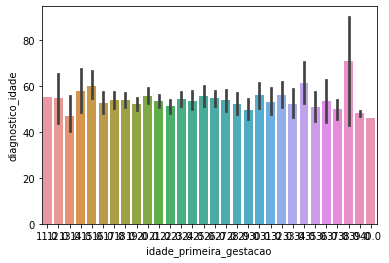

In [471]:
sns.barplot(data=df_demograficos, x="idade_primeira_gestacao", y="diagnostico_idade")

Segunda hipótese onde tentamos identificar a relação entre quanto mais cedo a mulher menstrua mais cedo é a possibilidade dela desenvolver o cancer de mama

<AxesSubplot:xlabel='idade_primeira_menstruacao', ylabel='diagnostico_idade'>

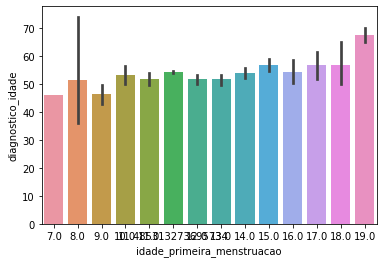

In [472]:
sns.barplot(data=df_demograficos, x="idade_primeira_menstruacao", y="diagnostico_idade")

<AxesSubplot:title={'center':'Progesterona inicial x probabilidade de cura'}, xlabel='Último dado do paciente', ylabel='Quantidade inicial de progesterona, em média'>

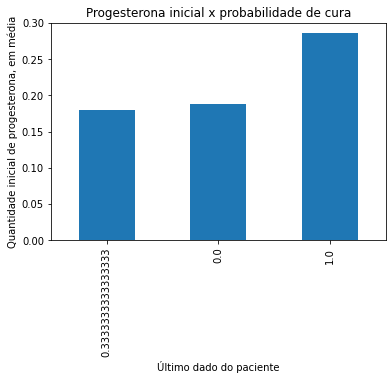

In [473]:
df['progesterona_quantificacao_inicial'] = df['progesterona_quantificacao_inicial'].astype('float')
df_agrupado_obito = df.groupby("ultimo_dado_paciente")
df_agrupado_obito['progesterona_quantificacao_inicial'].mean().sort_values()[:1].plot(kind='bar', ylabel="Quantidade inicial de progesterona, em média", xlabel="Último dado do paciente", title="Progesterona inicial x probabilidade de cura")

<AxesSubplot:title={'center':'Progesterona inicial x ki67 inicial'}, xlabel='Progesterona inicial', ylabel='ki67 inicial'>

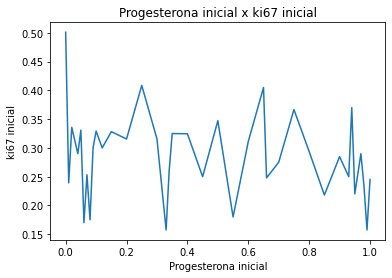

In [474]:
df_agrupado_ki67 = df.groupby("progesterona_quantificacao_inicial")
df_agrupado_ki67['ki67_inicial'].mean().plot(kind='line', ylabel='ki67 inicial', xlabel='Progesterona inicial', title="Progesterona inicial x ki67 inicial")